### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


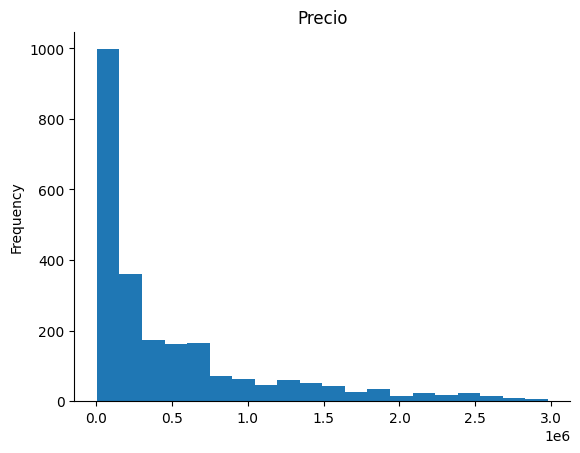

In [ ]:
# @title Precio

from matplotlib import pyplot as plt
tienda['Precio'].plot(kind='hist', bins=20, title='Precio')
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análisis de facturación



In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

NOMBRE_TIENDA = []
INGRESO_TOTAL = []

for nombre, datos in tiendas.items():
    ingreso = datos["Precio"].sum()
    NOMBRE_TIENDA.append(nombre)
    INGRESO_TOTAL.append(ingreso)
    print(f"{nombre}: ${ingreso:.0f}")

Tienda 1: $1150880400
Tienda 2: $1116343500
Tienda 3: $1098019600
Tienda 4: $1038375700


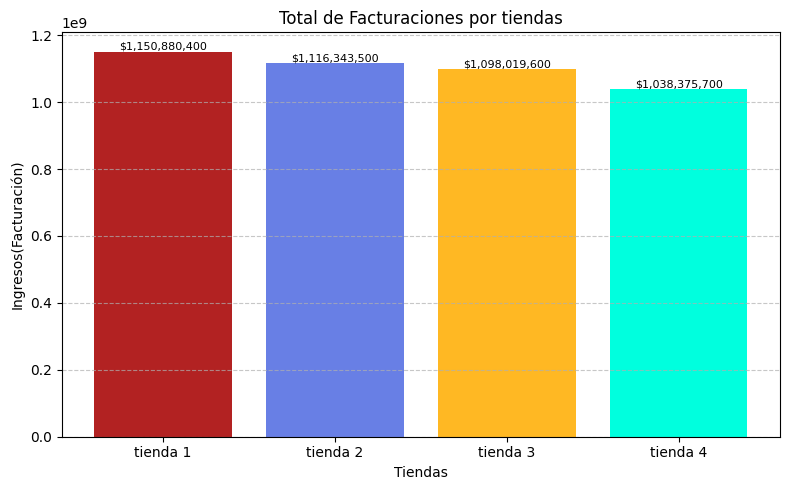

In [ ]:
import matplotlib.pyplot as plt

tiendas = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
ingresosTiendas = INGRESO_TOTAL
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE']

plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, ingresosTiendas, color=colores)
plt.title('Total de Facturaciones por tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos(Facturación)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for barra in barras:
    valory = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, valory, f'${valory:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
df_tienda = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Estas son las ventas por Categoría de la Tienda 1')
print(df_tienda)
print('\n')

df_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Estas son las ventas por Categoría de la Tienda 2')
print(df_tienda2)
print('\n')

df_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Estas son las ventas por Categoría de la Tienda 3')
print(df_tienda3)
print('\n')

df_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
print(f'Estas son las ventas por Categoría de la Tienda 4')
print(df_tienda4)
print('\n')

Estas son las ventas por Categoría de la Tienda 1
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64


Estas son las ventas por Categoría de la Tienda 2
Categoría del Producto
Electrónicos               410831100.0
Electrodomésticos          348567800.0
Muebles                    176426300.0
Instrumentos musicales     104990300.0
Deportes y diversión        34744500.0
Juguetes                    15945400.0
Artículos para el hogar     14746900.0
Libros                      10091200.0
Name: Precio, dtype: float64


Estas son las ventas por Categoría de la Tienda 3
Categoría del Producto
Electrónicos               410775800.0
Electrodomésticos          329237900.0
Muebles          

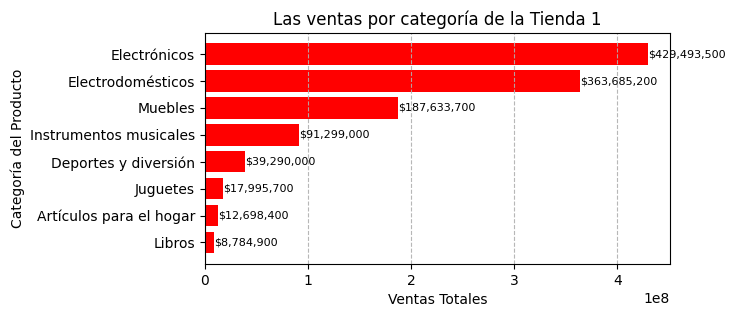

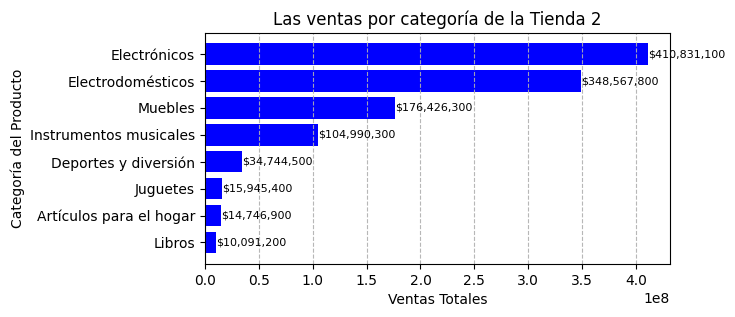

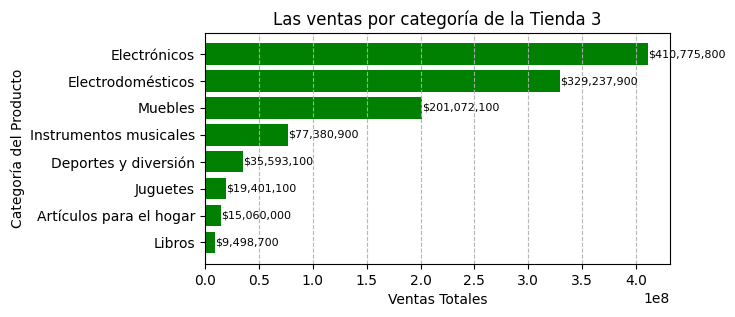

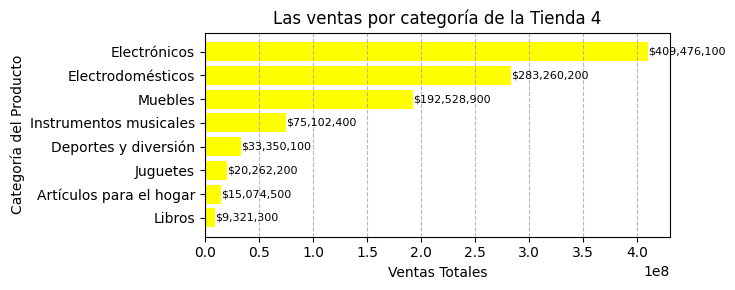

In [ ]:
plt.figure(figsize=(6, 3))
barras = plt.barh(df_tienda.index, df_tienda.values, color='red')
plt.title('Las ventas por categoría de la Tienda 1')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría del Producto')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.gca().invert_yaxis()

for barra in barras:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height() / 2, f'${valorx:,.0f}', va='center', fontsize=8)

plt.figure(figsize=(6, 3))
barras = plt.barh(df_tienda2.index, df_tienda2.values, color='blue')
plt.title('Las ventas por categoría de la Tienda 2')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría del Producto')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.gca().invert_yaxis()

for barra in barras:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height() / 2, f'${valorx:,.0f}', va='center', fontsize=8)

plt.figure(figsize=(6, 3))
barras = plt.barh(df_tienda3.index, df_tienda3.values, color='green')
plt.title('Las ventas por categoría de la Tienda 3')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría del Producto')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.gca().invert_yaxis()

for barra in barras:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height() / 2, f'${valorx:,.0f}', va='center', fontsize=8)

plt.figure(figsize=(7.4, 3))
barras = plt.barh(df_tienda4.index, df_tienda4.values, color='yellow')
plt.title('Las ventas por categoría de la Tienda 4')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría del Producto')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.gca().invert_yaxis()

for barra in barras:
    valorx = barra.get_width()
    plt.text(valorx, barra.get_y() + barra.get_height() / 2, f'${valorx:,.0f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
promedioTienda = tienda['Calificación'].mean()
promedioTienda2 = tienda2['Calificación'].mean()
promedioTienda3 = tienda3['Calificación'].mean()
promedioTienda4 = tienda4['Calificación'].mean()

print(f'La calificación promedio de la tienda 1 es: {promedioTienda:.2f}')
print(f'La calificación promedio de la tienda 2 es: {promedioTienda2:.2f}')
print(f'La calificación promedio de la tienda 3 es: {promedioTienda3:.2f}')
print(f'La calificación promedio de la tienda 4 es: {promedioTienda4:.2f}')

La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


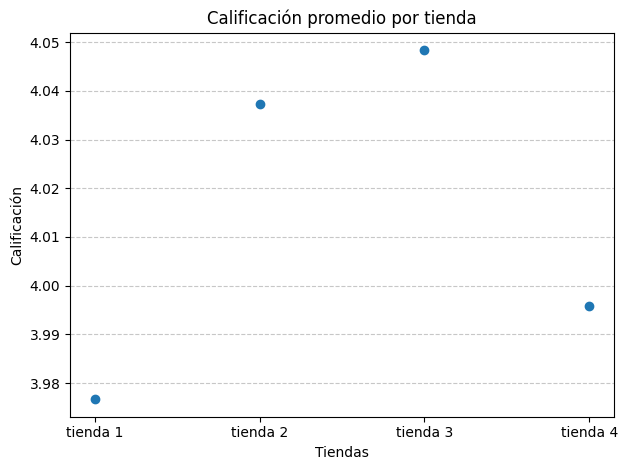

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

eyex = np.array(['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4'])
eyey = np.array([promedioTienda, promedioTienda2, promedioTienda3, promedioTienda4])
plt.scatter(eyex,eyey)
plt.xlabel('Tiendas')
plt.ylabel('Calificación')
plt.title('Calificación promedio por tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

Los productos más vendidos de la tienda 1 son: 
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64


Los productos más vendidos de la tienda 2 son: 
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64


Los productos más vendidos de la tienda 3 son: 
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64
Producto
Kit de b

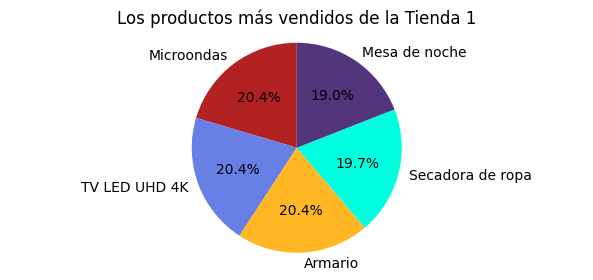

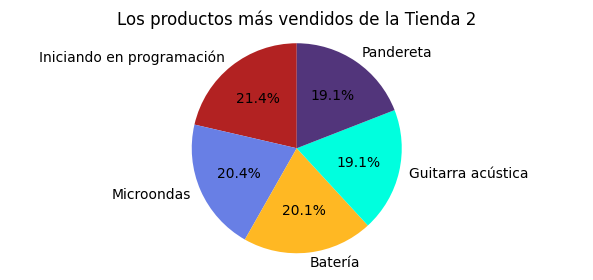

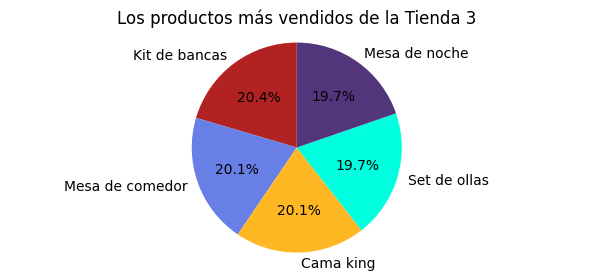

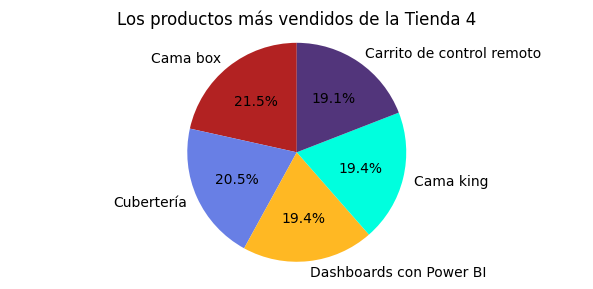

In [ ]:
top5_tienda1 = tienda["Producto"].value_counts().head(5)
print(f'Los productos más vendidos de la tienda 1 son: \n{top5_tienda1}')
print(top5_tienda1)
print('\n')

plt.figure(figsize=(7.4, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(top5_tienda1, labels=top5_tienda1.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos más vendidos de la Tienda 1')
plt.axis('equal')

top5_tienda2 = tienda2["Producto"].value_counts().head(5)
print(f'Los productos más vendidos de la tienda 2 son: \n{top5_tienda2}')
print(top5_tienda2)
print('\n')

plt.figure(figsize=(7.4, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(top5_tienda2, labels=top5_tienda2.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos más vendidos de la Tienda 2')
plt.axis('equal')

top5_tienda3 = tienda3["Producto"].value_counts().head(5)
print(f'Los productos más vendidos de la tienda 3 son: \n{top5_tienda3}')
print(top5_tienda3)
print('\n')

plt.figure(figsize=(7.4, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(top5_tienda3, labels=top5_tienda3.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos más vendidos de la Tienda 3')
plt.axis('equal')

top5_tienda4 = tienda4["Producto"].value_counts().head(5)
print(f'Los productos más vendidos de la tienda 4 son: \n{top5_tienda4}')
print(top5_tienda4)
print('\n')

plt.figure(figsize=(6.09, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(top5_tienda4, labels=top5_tienda4.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos más vendidos de la Tienda 4')
plt.axis('equal')

plt.tight_layout()
plt.show()

Los productos menos vendidos de la tienda 1 son: 
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


Los productos menos vendidos de la tienda 2 son: 
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


Los productos menos vendidos de la tienda 3 son: 
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de constr

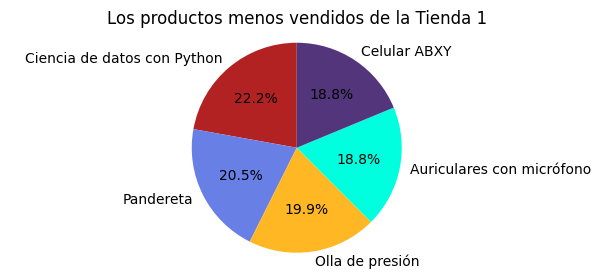

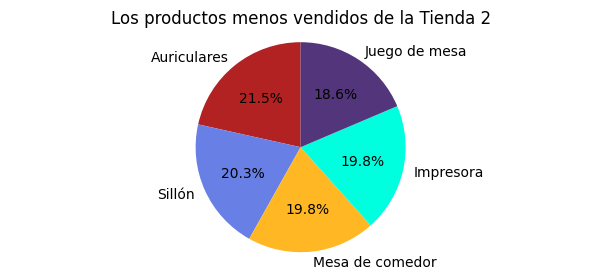

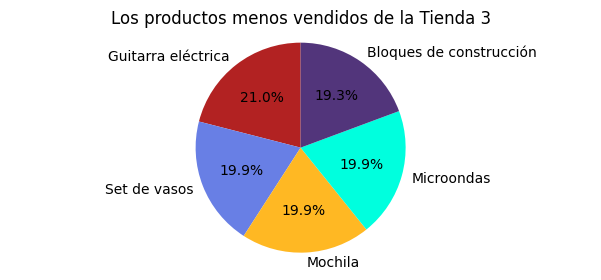

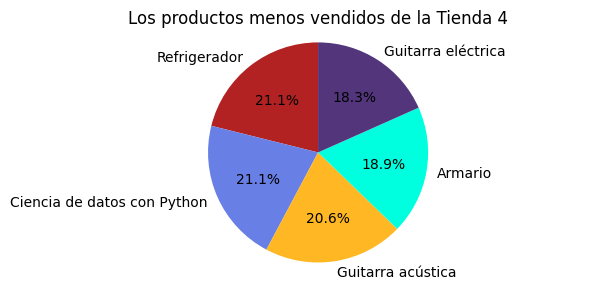

In [ ]:
less5_tienda1 = tienda["Producto"].value_counts().tail(5)
print(f'Los productos menos vendidos de la tienda 1 son: \n{less5_tienda1}')
print(less5_tienda1)
print('\n')

plt.figure(figsize=(7.4, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(less5_tienda1, labels=less5_tienda1.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos menos vendidos de la Tienda 1')
plt.axis('equal')

less5_tienda2 = tienda2["Producto"].value_counts().tail(5)
print(f'Los productos menos vendidos de la tienda 2 son: \n{less5_tienda2}')
print(less5_tienda2)
print('\n')

plt.figure(figsize=(7.5, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(less5_tienda2, labels=less5_tienda2.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos menos vendidos de la Tienda 2')
plt.axis('equal')

less5_tienda3 = tienda3["Producto"].value_counts().tail(5)
print(f'Los productos menos vendidos de la tienda 3 son: \n{less5_tienda3}')
print(less5_tienda3)
print('\n')

plt.figure(figsize=(7.5, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(less5_tienda3, labels=less5_tienda3.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos menos vendidos de la Tienda 3')
plt.axis('equal')

less5_tienda4 = tienda4["Producto"].value_counts().tail(5)
print(f'Los productos menos vendidos de la tienda 4 son: \n{less5_tienda4}')
print(less5_tienda4)
print('\n')

plt.figure(figsize=(6.34, 3))
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE', '#52357B',]
plt.pie(less5_tienda4, labels=less5_tienda4.index,colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Los productos menos vendidos de la Tienda 4')
plt.axis('equal')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
import matplotlib.pyplot as plt

costoEnvio = tienda['Costo de envío'].mean()
costoEnvio2 = tienda2['Costo de envío'].mean()
costoEnvio3 = tienda3['Costo de envío'].mean()
costoEnvio4 = tienda4['Costo de envío'].mean()

print(f'El costo promedio de envío de la tienda 1 es: ${costoEnvio:.2f}')
print(f'El costo promedio de envío de la tienda 2 es: ${costoEnvio2:.2f}')
print(f'El costo promedio de envío de la tienda 3 es: ${costoEnvio3:.2f}')
print(f'El costo promedio de envío de la tienda 4 es: ${costoEnvio4:.2f}')

El costo promedio de envío de la tienda 1 es: $26018.61
El costo promedio de envío de la tienda 2 es: $25216.24
El costo promedio de envío de la tienda 3 es: $24805.68
El costo promedio de envío de la tienda 4 es: $23459.46


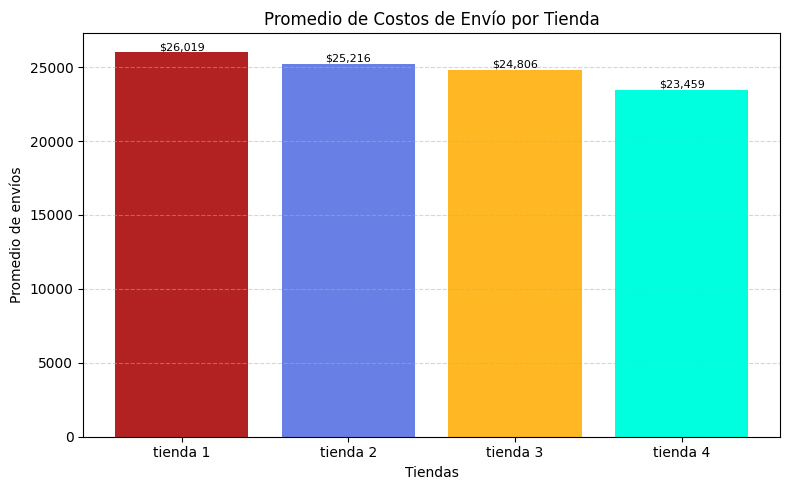

In [ ]:
tiendas = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
costosEnvio = [costoEnvio, costoEnvio2, costoEnvio3, costoEnvio4]
colores = ['#B22222', '#687FE5', '#FFB823', '#00FFDE']

plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, costosEnvio, color=colores)
plt.title('Promedio de Costos de Envío por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Promedio de envíos')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for barra in barras:
    valory = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, valory, f'${valory:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()